# Лекция 2

## Суммирование значений и другие агрегатные функции


In [167]:
import numpy as np

rng = np.random.default_rng(1)
s = rng.random(50)

print(s)

print(sum(s))

print(np.sum(s))


[0.51182162 0.9504637  0.14415961 0.94864945 0.31183145 0.42332645
 0.82770259 0.40919914 0.54959369 0.02755911 0.75351311 0.53814331
 0.32973172 0.7884287  0.30319483 0.45349789 0.1340417  0.40311299
 0.20345524 0.26231334 0.75036467 0.28040876 0.48519097 0.9807372
 0.96165719 0.72478994 0.54122686 0.2768912  0.16065201 0.96992541
 0.51606859 0.11586561 0.62348976 0.77668311 0.6130033  0.9172977
 0.03959288 0.52858926 0.45933588 0.06234958 0.64132817 0.85263284
 0.59294102 0.26009745 0.83988152 0.50949588 0.51088888 0.75303021
 0.14792204 0.81962672]
25.985704258037675
25.98570425803768


In [168]:
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
print(np.sum(a))
print(np.sum(a, axis=0))
print(np.sum(a, axis=1))


55
[ 7  9 11 13 15]
[15 40]


In [169]:
print(np.min(a))
print(np.min(a, axis=0))
print(np.min(a, axis=1))

1
[1 2 3 4 5]
[1 6]


In [170]:
print(a.min())
print(a.min(0))
print(a.min(1))

1
[1 2 3 4 5]
[1 6]


In [171]:
print(np.nanmin(a))
print(np.nanmin(a, axis=0))
print(np.nanmin(a, axis=1))

1
[1 2 3 4 5]
[1 6]


## Транслирование (broadcasting)

Набор правил, которые позволяют осуществять бинарные операции с массивами разных форм и размеров

In [172]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
print(a+b)

[5 6 7]


In [173]:
print(a+5) # 5 транслируется в массив [5, 5, 5], подстраивается под размер первого слагаемого

[5 6 7]


In [174]:
a = np.array([[0, 1, 2], [3, 4, 5]])
print(a+5)

[[ 5  6  7]
 [ 8  9 10]]


In [175]:
a = np.array([0, 1, 2])
b = np.array([[0], [1], [2]]) 
print(a+b)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


## Правила транслирования
1. Если размерности массива отличаются, то форма массива с меньшей дополняется 1 с левой стороны

In [176]:
a = np.array([[0, 1, 2], [3, 4, 5]])
b = np.array([5])
print(a.shape)
print(b.shape)

print(a+b)

(2, 3)
(1,)
[[ 5  6  7]
 [ 8  9 10]]


(1, ) -> (1, 1)

2. Если формы массивов не совпадают в каком-то измерении и в этом измерении размер 1, то размер становится соответствующим другому массиву (через "растяжение").
3. Если после применения этих правил в каком-либо измерении размеры все ещё отличаются, то возвращается ошибка

In [177]:
a = np.ones((2, 3))
b = np.arange(3)
print(a.shape)
print(b.shape)

(2, 3)
(3,)


(2, 3) <br>
(3,) -> (1, 3) -> (2, 3)


In [178]:
c = a + b
print(c, c.shape)

[[1. 2. 3.]
 [1. 2. 3.]] (2, 3)


In [179]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
print(a)
print()
print(b)

[[0]
 [1]
 [2]]

[0 1 2]


(3, 1) -> (3, 3)<br>
(3,) -> (1, 3) -> (3, 3)

In [180]:
c = a + b
print(c, c.shape)

[[0 1 2]
 [1 2 3]
 [2 3 4]] (3, 3)


$$ \begin{bmatrix}
0 & 0 & 0\\
1 & 1 & 1\\
2 & 2 & 2
\end{bmatrix} + \begin{bmatrix}
0 & 1 & 2\\
0 & 1 & 2\\
0 & 1 & 2
\end{bmatrix}$$

In [181]:
a = np.ones((3, 2))
b = np.arange(3)

(3, 2) -> (3, 2)<br>
(3, ) -> (1, 3) -> (3, 3)<br>
Error!

In [182]:
c = a + b

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

Q1. Что надо изменить в последнем примере, чтобы он заработал без ошибок?

In [183]:
x = np.array([[1, 2, 3, 4 ,5 ,6, 7, 8, 9], [9, 8, 7, 6, 5, 4, 3, 2, 1]])
x_mean0 = x.mean(0)
print(x_mean0)

[5. 5. 5. 5. 5. 5. 5. 5. 5.]


In [184]:
x_centered0 = x - x.mean(0)
print(x_centered0)

[[-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [ 4.  3.  2.  1.  0. -1. -2. -3. -4.]]


In [185]:
x_mean1 = x.mean(1)
print(x_mean1)

x_mean1 = x_mean1[:, np.newaxis]

x_center = x - x_mean1
print(x_center)

[5. 5.]
[[-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [ 4.  3.  2.  1.  0. -1. -2. -3. -4.]]


In [186]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x)**3 + np.cos(20 + y*x) * np.sin(y)

print(z.shape)


(50, 50)


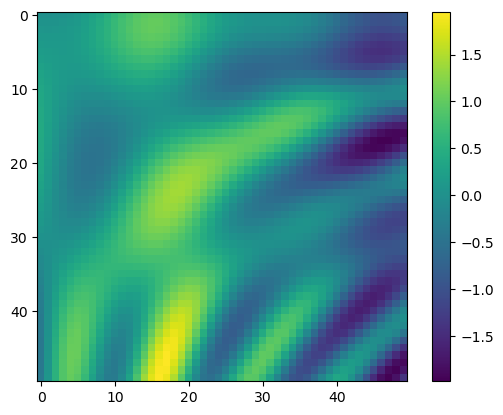

In [187]:
import matplotlib.pyplot as plt
plt.imshow(z)
plt.colorbar()
plt.show()

In [188]:
x = np.arange(1, 6, 1)
y = np.vstack((np.arange(1, 6, 1), np.arange(6, 11, 1)))
print(x < 3)
print(y)

[ True  True False False False]
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


In [189]:
print(np.less(x, 3))

[ True  True False False False]


True = 1<br>
False = 0

In [190]:
print(np.sum(x < 3))
print(np.sum(y < 4, axis=0))

2
[1 1 1 0 0]


# Побитовые операции

Q2: См. пример для y. Вычислить количество элементов по (обеим размерностям), значения которых больше 3 и меньше 9

In [191]:
x = np.arange(1, 6)
print(x[x < 3])

[1 2]


In [192]:
print(42 & 1)

0


## Векторизация индекса

In [193]:
x = np.arange(10)
index = [1, 5, 7]
print(x[index])

[1 5 7]


In [194]:
index = [[1, 5, 7], [2, 4, 8]]
print(x[index])

[[1 5 7]
 [2 4 8]]


Форма результата представляет собой форму индекса, если индекс векторизован.

In [195]:
x = np.arange(12).reshape((3, 4))
print(x[2, [2, 0, 1]])

[10  8  9]


In [196]:
print(x[1:, [2, 0, 1]])

[[ 6  4  5]
 [10  8  9]]


In [197]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [198]:
x[i] = 999
print(x)

[  0 999 999   3 999   5   6   7 999   9]


In [199]:
x = np.array([3, 2, 3, 5, 6, 7, 1])
print(sorted(x))

[1, 2, 3, 3, 5, 6, 7]


In [200]:
print(np.sort(x))
x.sort()

[1 2 3 3 5 6 7]


In [201]:
print(x)

[1 2 3 3 5 6 7]


In [204]:
data = np.zeros(3, dtype={
    'names':(
        'name', 'age'
    ),
    'formats':(
        'U10', 'i4'
    )
})

print(data.dtype)

[('name', '<U10'), ('age', '<i4')]


## Cтруктурированные массивы

In [205]:
name = ['Alice', 'Bob', 'Eve']
age = [20, 30, 40]
data['name'] = name
data['age'] = age
print(data)

[('Alice', 20) ('Bob', 30) ('Eve', 40)]


In [206]:
print(data[data['age']>20])

[('Bob', 30) ('Eve', 40)]


## Массивы записей

In [207]:
data_rec = data.view(np.recarray)

In [208]:
print(data_rec)

[('Alice', 20) ('Bob', 30) ('Eve', 40)]


In [209]:
print(data_rec[0])

('Alice', 20)


In [210]:
print(data_rec[-1].name)

Eve
